In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
x, y = make_blobs(n_features=2, n_samples=1000, centers=3)

In [4]:
x

array([[-3.51870737, -3.06169652],
       [-0.75522502, -0.82504329],
       [ 0.11795085, -6.00498714],
       ...,
       [ 1.08952789, -5.50441522],
       [-3.69813452, -2.70398549],
       [ 1.56647035, -3.7023131 ]], shape=(1000, 2))

In [5]:
y

array([2, 2, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 0,
       2, 1, 2, 1, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 2, 0, 2,
       1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0,
       0, 2, 0, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2,
       1, 0, 0, 0, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 0, 1, 1, 2, 1,
       2, 2, 0, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 0, 1, 0,
       0, 1, 2, 1, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 0,
       1, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 0, 0, 2, 2, 1,
       0, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 0,
       0, 2, 2, 1, 0, 0, 2, 0, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 0,
       1, 1, 0, 2, 0, 0, 0, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 0, 0, 2,

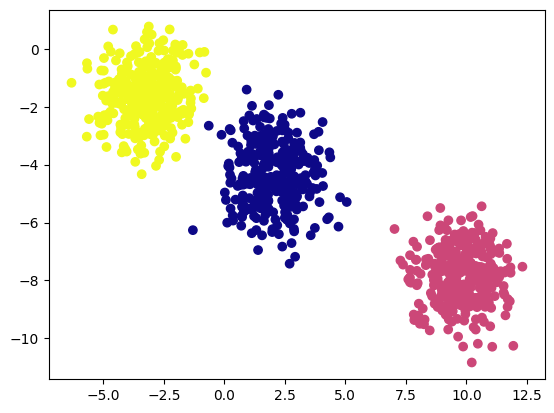

In [9]:
### Visualize the data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='plasma')

In [11]:
### Train - Test Splt
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [12]:
### Standardized the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_train)

In [14]:
### K Means

from sklearn.cluster import KMeans

In [15]:
### Elbow method To select K Value
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x_train_scaled)
    wcss.append(kmeans.inertia_)

In [16]:
wcss

[1340.0000000000011,
 304.8466361944362,
 108.26310742337847,
 86.37111068849036,
 68.82175336889212,
 52.21742393028338,
 47.48958887550789,
 41.96515183108238,
 39.3979992142267,
 35.68649088662011]

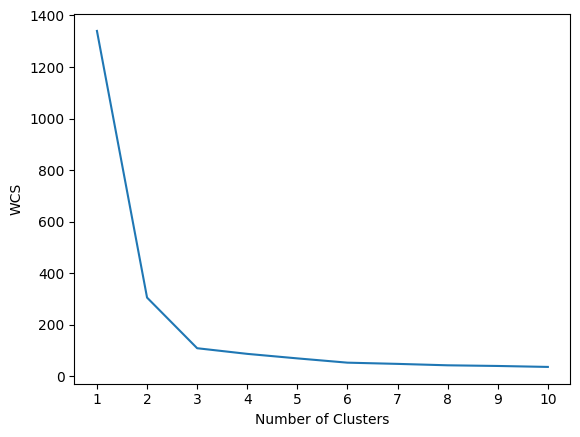

In [18]:
### Plot Elbow Curve
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCS")
plt.show()

In [19]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [20]:
kmeans.fit_predict(x_train_scaled)

array([2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1,
       0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2,
       1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0,
       0, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 2,
       1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 1, 2, 1,
       0, 2, 0, 2, 1, 1, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 0, 2, 0, 0,
       0, 1, 1, 0, 2, 1, 0, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0,
       2, 1, 1, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 1, 0,
       2, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0, 1,
       0, 0, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0,
       2, 1, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 1, 2, 1,

In [21]:
y_pred = kmeans.predict(x_test_scaled)

In [22]:
y_pred

array([2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1,
       0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2,
       1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0,
       0, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 2,
       1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 1, 2, 1,
       0, 2, 0, 2, 1, 1, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 0, 2, 0, 0,
       0, 1, 1, 0, 2, 1, 0, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0,
       2, 1, 1, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 1, 0,
       2, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0, 1,
       0, 0, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0,
       2, 1, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 1, 2, 1,

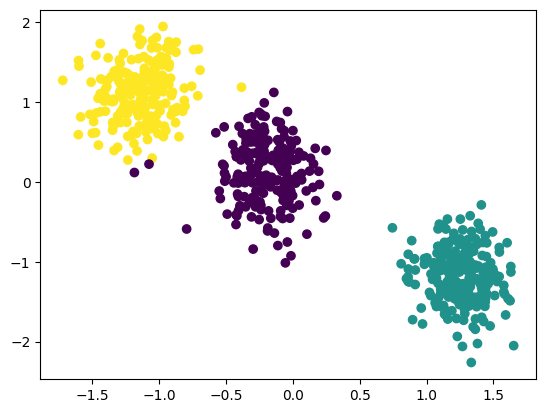

In [26]:
plt.scatter(x_test_scaled[:,0], x_test_scaled[:,1], c=y_pred)

### Validating the K Value
1. KneeLocator
2. Silhoute scoring

In [28]:
### kneelocator
!pip install kneed

In [31]:
from kneed import KneeLocator

In [32]:
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

In [33]:
kl.elbow

np.int64(3)